In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2

In [2]:
dir_path="datasets\\flower_photos"

In [3]:
if not os.listdir(dir_path):
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
    keras.utils.get_file("flower_photos",origin=url,cache_dir='.',untar=True)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'datasets\\flower_photos'

In [ ]:
import pathlib

In [ ]:
sub_dir=[]
for path in os.listdir(dir_path):
    if path is not None:
        sub_dir.append(os.path.join(dir_path,path))

sub_dir

['datasets\\flower_photos\\daisy',
 'datasets\\flower_photos\\dandelion',
 'datasets\\flower_photos\\roses',
 'datasets\\flower_photos\\sunflowers',
 'datasets\\flower_photos\\tulips']

In [ ]:
labels=[]
for label in os.listdir(dir_path):
    labels.append(label)

labels

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
interchange_label={sub_dir[i] : i for i in range(len(labels))}
interchange_label

{'datasets\\flower_photos\\daisy': 0,
 'datasets\\flower_photos\\dandelion': 1,
 'datasets\\flower_photos\\roses': 2,
 'datasets\\flower_photos\\sunflowers': 3,
 'datasets\\flower_photos\\tulips': 4}

In [ ]:
root_directory = "datasets\\flower_photos"

data = []

for label in os.listdir(root_directory):
    label_directory = os.path.join(root_directory, label)
    if os.path.isdir(label_directory):
        for image_file in os.listdir(label_directory):
            if image_file.endswith(".jpg" or ".png"):  # Assuming your images are JPEG files
                file_path = os.path.join(label_directory, image_file)
                data.append((file_path, label))
data
df = pd.DataFrame(data, columns=["file_path", "label"])
df

,file_path,label
0,datasets\flower_photos\daisy\100080576_f52e8ee...,daisy
1,datasets\flower_photos\daisy\10140303196_b88d3...,daisy
2,datasets\flower_photos\daisy\10172379554_b2960...,daisy
3,datasets\flower_photos\daisy\10172567486_27488...,daisy
4,datasets\flower_photos\daisy\10172636503_21bed...,daisy
...,...,...
3665,datasets\flower_photos\tulips\9831362123_5aac5...,tulips
3666,datasets\flower_photos\tulips\9870557734_88eb3...,tulips
3667,datasets\flower_photos\tulips\9947374414_fdf1d...,tulips
3668,datasets\flower_photos\tulips\9947385346_3a8ca...,tulips


In [ ]:
import time

start = time.time()

df["images"] = df["file_path"].apply(
    lambda path: cv2.resize(cv2.imread(path), (128, 128))
)

end = time.time()

total = end - start
total

11.485704183578491

In [ ]:
import cv2
import numpy as np

def process_images(paths):
    batch_images = []
    for path in paths:
        img = cv2.imread(path)
        img = cv2.resize(img, (128, 128))
        img = img.astype(np.float32) / 255.0  
        batch_images.append(img)
    return np.array(batch_images)

batch_size = 60

num_images = len(df["file_path"])
processed_images = []

for i in range(0, num_images, batch_size):
    batch_paths = df["file_path"][i:i+batch_size].tolist()
    batch_processed = process_images(batch_paths)
    processed_images.append(batch_processed)

# Concatenate processed batches into a single numpy array
X= np.concatenate(processed_images, axis=0)
X.shape

(3670, 128, 128, 3)

In [11]:
y=df['label']
# y=pd.get_dummies(y).astype(int)
# y=keras.utils.to_categorical(y,5,dtype=float)
y

(3670,)

In [12]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y=le.fit_transform(y)
y=np.array(y)
y

array([0, 0, 0, ..., 4, 4, 4])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=48)

In [15]:
X_train.shape,y_train.shape

((2936, 128, 128, 3), (2936,))

In [16]:
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                  input_shape=(128, 
                                                              128,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomCrop(128,128),
    keras.layers.experimental.preprocessing.RandomRotation(0.3),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.3)
  ]
)

In [17]:
data_augmentation(X)[0]

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.71226037, 0.6816737 , 0.66781104],
        [0.70337164, 0.6736361 , 0.66285634],
        [0.6849071 , 0.6552971 , 0.6489545 ],
        ...,
        [0.526662  , 0.5476742 , 0.5434342 ],
        [0.5216175 , 0.5483598 , 0.5460122 ],
        [0.5154582 , 0.55094796, 0.5499951 ]],

       [[0.70753604, 0.67871094, 0.6664521 ],
        [0.7035743 , 0.67458075, 0.6674306 ],
        [0.6867322 , 0.66048056, 0.6563177 ],
        ...,
        [0.55353564, 0.5700824 , 0.5657708 ],
        [0.5456182 , 0.5638204 , 0.55987537],
        [0.5345286 , 0.5620184 , 0.5610032 ]],

       [[0.69057643, 0.6588543 , 0.6465123 ],
        [0.7038199 , 0.67081803, 0.6611354 ],
        [0.69052845, 0.6669317 , 0.6633508 ],
        ...,
        [0.5692324 , 0.5825743 , 0.5783611 ],
        [0.55419457, 0.5698747 , 0.56566477],
        [0.5408462 , 0.56589663, 0.56331444]],

       ...,

       [[0.39437485, 0.46327317, 0.47378892],
        [0.40

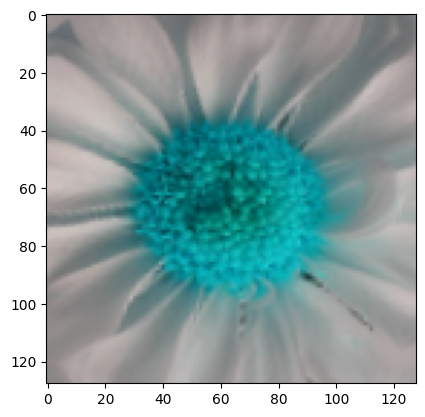

In [18]:
import matplotlib.pyplot as plt

plt.imshow(data_augmentation(X)[0])

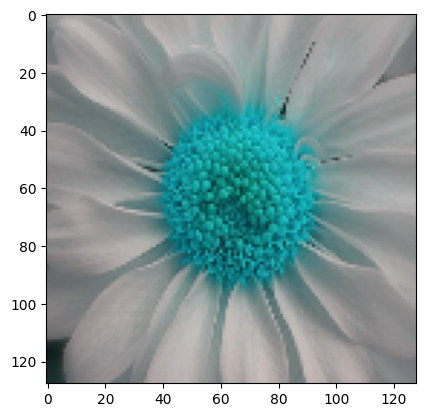

In [19]:
plt.imshow(X[0])

In [20]:
cnn=keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(5,activation='softmax')
])
cnn.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False)
            ,optimizer='adam',metrics=['accuracy'])

In [21]:
cnn.fit(X_train,y_train,epochs=30)

Epoch 1/30
92/92 [==============================] - 51s 527ms/step - loss: 1.4673 - accuracy: 0.3607
Epoch 2/30
92/92 [==============================] - 51s 555ms/step - loss: 1.1804 - accuracy: 0.4932
Epoch 3/30
92/92 [==============================] - 49s 534ms/step - loss: 1.1204 - accuracy: 0.5507
Epoch 4/30
92/92 [==============================] - 48s 523ms/step - loss: 1.0451 - accuracy: 0.5811
Epoch 5/30
92/92 [==============================] - 49s 537ms/step - loss: 1.0215 - accuracy: 0.5841
Epoch 6/30
92/92 [==============================] - 50s 546ms/step - loss: 0.9473 - accuracy: 0.6219
Epoch 7/30
92/92 [==============================] - 51s 556ms/step - loss: 0.9347 - accuracy: 0.6322
Epoch 8/30
92/92 [==============================] - 53s 575ms/step - loss: 0.8758 - accuracy: 0.6601
Epoch 9/30
92/92 [==============================] - 53s 576ms/step - loss: 0.8545 - accuracy: 0.6689
Epoch 10/30
92/92 [==============================] - 51s 554ms/step - loss: 0.8170 - accura

In [22]:
cnn.evaluate(X_test,y_test)

23/23 [==============================] - 3s 119ms/step - loss: 0.7086 - accuracy: 0.7098


[0.708567202091217, 0.7098092436790466]

In [23]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                 